In [15]:
# !pip install seaborn

In [16]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from collections import Counter
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances

import warnings
warnings.filterwarnings('ignore')

In [17]:
# Upload the data
df = pd.read_csv("FINAL.csv")
df

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Salary
0,Precious Achiuwa,PF,21,MIA,61,4,737,124,228,0.543860,...,73,135,208,29,20,28,43,91,304,2582160
1,Jaylen Adams,PG,24,MIL,7,0,18,1,8,0.125000,...,0,3,3,2,0,0,0,1,2,449115
2,Steven Adams,C,27,NOP,58,58,1605,189,308,0.613636,...,213,301,514,111,54,38,78,113,438,29592695
3,Bam Adebayo,C,23,MIA,64,64,2143,456,800,0.570000,...,142,431,573,346,75,66,169,145,1197,5115492
4,LaMarcus Aldridge,C,35,BRK,52,46,1348,280,592,0.472973,...,38,198,236,98,22,58,54,94,704,17628340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,Delon Wright,PG,28,SAC,126,78,3496,480,1036,0.463320,...,130,408,538,556,202,60,166,150,1290,9000000
537,Thaddeus Young,PF,32,CHI,68,23,1652,370,662,0.558912,...,168,255,423,291,74,40,137,152,823,13545000
538,Trae Young,PG,22,ATL,63,63,2125,487,1112,0.437950,...,38,207,245,594,53,12,261,111,1594,6571800
539,Cody Zeller,C,28,CHO,48,21,1005,181,324,0.558642,...,119,209,328,86,27,17,51,121,451,15415730


In [18]:
pos = "C"
player = "Ivica Zubac"

In [19]:
df1 = df.loc[df["Pos"]==pos]

In [20]:
x = df1.loc[df1["Player"]==player]
x = x.drop(columns=["Player", "Tm", "Pos", "Salary"])

y = df1.drop(columns=["Player", "Tm", "Pos", "Salary"])

In [21]:
df1["Distance"] = euclidean_distances(x, y)[0]
df1

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Salary,Distance
2,Steven Adams,C,27,NOP,58,58,1605,189,308,0.613636,...,301,514,111,54,38,78,113,438,29592695,292.058532
3,Bam Adebayo,C,23,MIA,64,64,2143,456,800,0.570000,...,431,573,346,75,66,169,145,1197,5115492,1067.254431
4,LaMarcus Aldridge,C,35,BRK,52,46,1348,280,592,0.472973,...,198,236,98,22,58,54,94,704,17628340,530.342144
8,Jarrett Allen,C,22,CLE,126,90,3728,596,964,0.618257,...,870,1262,212,64,180,200,192,1612,3909902,2725.621514
21,Deandre Ayton,C,22,PHO,69,69,2115,430,687,0.625910,...,499,727,99,41,81,103,196,997,10018200,821.019491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,Robert Williams,C,23,BOS,52,13,985,186,258,0.720930,...,225,358,94,43,91,52,105,417,2029920,746.613760
533,James Wiseman,C,19,GSW,39,27,836,191,368,0.519022,...,171,226,26,11,36,60,121,448,8730240,898.844856
534,Christian Wood,C,25,HOU,41,41,1326,329,640,0.514062,...,319,395,71,34,48,80,88,860,13015874,528.208360
539,Cody Zeller,C,28,CHO,48,21,1005,181,324,0.558642,...,209,328,86,27,17,51,121,451,15415730,707.129435


In [22]:
df1 = df1.sort_values(by="Distance", ascending=True).reset_index(drop=True)
df1[1:6]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Salary,Distance
1,Mason Plumlee,C,30,DET,56,56,1499,234,381,0.614173,...,374,519,202,43,50,105,186,581,8000000,192.689079
2,Daniel Gafford,C,22,WAS,108,22,1582,308,450,0.684444,...,274,462,58,52,150,82,196,760,1517981,210.791453
3,Isaiah Stewart,C,19,DET,68,14,1455,226,409,0.552567,...,294,453,59,39,86,67,184,537,3121080,257.454919
4,Tony Bradley,C,23,OKC,84,16,1368,262,394,0.664975,...,308,478,74,30,60,66,122,600,3542060,274.881726
5,Jakob Poeltl,C,25,SAS,69,51,1845,265,430,0.616279,...,328,547,134,47,123,83,172,593,8101852,278.991301


In [23]:
# Create the input variables
X = df1.drop(columns=["Player", "Tm", "Pos", "Salary"])

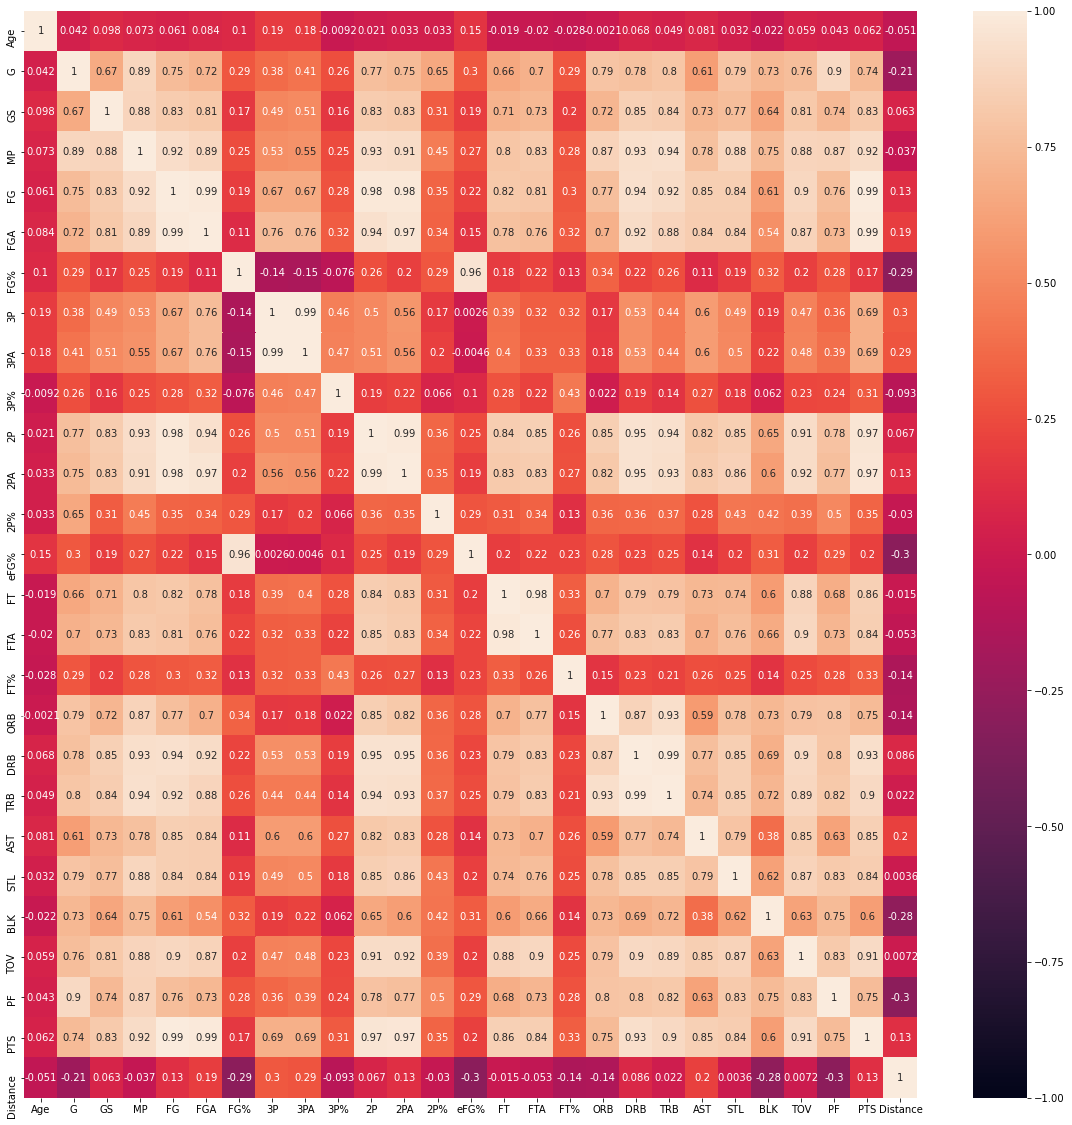

In [24]:
corrMatrix = X.corr()
plt.figure(figsize=(20, 20))
sn.heatmap(corrMatrix, vmin=-1, vmax=1, annot=True)
plt.show()

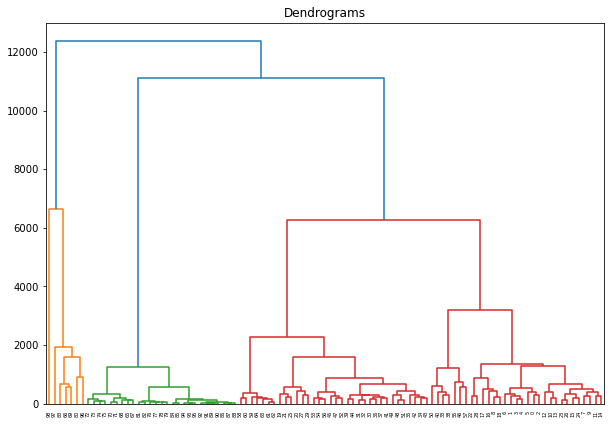

In [26]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X, method='ward'))

In [27]:
# Create the clustering model
#clustering = AgglomerativeClustering(n_clusters=int((len(X)/3))).fit(X)
clustering = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="ward", compute_distances=True).fit(X)
Counter(clustering.labels_)

Counter({1: 65, 2: 27, 0: 7})

In [28]:
len(clustering.children_)

98

In [29]:
len(clustering.distances_)

98

In [30]:
len(clustering.labels_)

99

In [31]:
len(df1)

99

In [32]:
df1["Label"] = clustering.labels_
df1

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,TRB,AST,STL,BLK,TOV,PF,PTS,Salary,Distance,Label
0,Ivica Zubac,C,23,LAC,72,33,1609,257,394,0.652284,...,519,90,24,62,81,187,650,7000000,0.000000,1
1,Mason Plumlee,C,30,DET,56,56,1499,234,381,0.614173,...,519,202,43,50,105,186,581,8000000,192.689079,1
2,Daniel Gafford,C,22,WAS,108,22,1582,308,450,0.684444,...,462,58,52,150,82,196,760,1517981,210.791453,1
3,Isaiah Stewart,C,19,DET,68,14,1455,226,409,0.552567,...,453,59,39,86,67,184,537,3121080,257.454919,1
4,Tony Bradley,C,23,OKC,84,16,1368,262,394,0.664975,...,478,74,30,60,66,122,600,3542060,274.881726,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Udonis Haslem,C,40,MIA,1,0,3,2,2,1.000000,...,1,0,0,0,0,0,4,2564753,1987.596550,2
95,Will Magnay,C,22,NOP,1,0,3,0,1,0.000000,...,0,0,0,0,1,1,0,341481,1990.220332,2
96,Nikola Jokic,C,25,DEN,72,72,2488,732,1293,0.566125,...,780,599,95,48,222,192,1898,29542010,2127.035975,0
97,Jarrett Allen,C,22,CLE,126,90,3728,596,964,0.618257,...,1262,212,64,180,200,192,1612,3909902,2725.621514,0


In [33]:
df_labeled = df1.loc[df1["Label"]==0]
df_labeled

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,TRB,AST,STL,BLK,TOV,PF,PTS,Salary,Distance,Label
66,Wendell Carter,C,21,ORL,108,88,2750,460,914,0.503282,...,886,208,70,84,156,292,1212,5448840,1569.176509,0
69,Khem Birch,C,28,TOR,134,44,3058,378,760,0.497368,...,774,178,96,100,88,226,964,3011499,1602.068662,0
80,Andre Drummond,C,27,LAL,92,92,2484,564,1144,0.493007,...,1102,188,126,98,248,298,1374,28751774,1809.694695,0
83,Daniel Theis,C,28,CHI,130,102,3202,504,932,0.540773,...,712,216,82,114,132,334,1254,5000000,1887.861401,0
96,Nikola Jokic,C,25,DEN,72,72,2488,732,1293,0.566125,...,780,599,95,48,222,192,1898,29542010,2127.035975,0
97,Jarrett Allen,C,22,CLE,126,90,3728,596,964,0.618257,...,1262,212,64,180,200,192,1612,3909902,2725.621514,0
98,Nikola Vucevic,C,30,CHI,140,140,4696,1332,2792,0.477077,...,1634,538,130,96,252,274,3278,26000000,5445.478477,0


In [34]:
target_player = df_labeled.loc[df_labeled["Player"]=="Derrick White"]
target_player

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,TRB,AST,STL,BLK,TOV,PF,PTS,Salary,Distance,Label


In [35]:
x = target_player.drop(columns=["Player", "Tm", "Pos", "Salary", "Label"])
y = df_labeled.drop(columns=["Player", "Tm", "Pos", "Salary", "Label"])